In [ ]:
# 카페에서 visualize.py 파일 다운. 

In [ ]:
# 평균 실루엣 그림을 그려줌 

# 실루엣 분석 START

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

* iris 데이터로 클러스터링 평가

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

In [6]:
kmeans =KMeans(n_clusters=3, random_state=2021)
kmeans.fit(iris_std)

KMeans(n_clusters=3, random_state=2021)

In [7]:
df = pd.DataFrame(iris.data, columns=['sl', 'sw', 'pl', 'pw'])
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head()

sl   sw   pl   pw  target  cluster
0  5.1  3.5  1.4  0.2       0        1
1  4.9  3.0  1.4  0.2       0        1
2  4.7  3.2  1.3  0.2       0        1
3  4.6  3.1  1.5  0.2       0        1
4  5.0  3.6  1.4  0.2       0        1

- 실루엣 계수 구하기 shilhoutte

In [11]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_smaples = silhouette_samples(iris_std, kmeans.labels_)
df['실루엣 계수'] = sil_smaples
df.head()
# 우리 그룹과 다른 그룹과의 거리

sl   sw   pl   pw  target  cluster    실루엣 계수
0  5.1  3.5  1.4  0.2       0        1  0.734195
1  4.9  3.0  1.4  0.2       0        1  0.568274
2  4.7  3.2  1.3  0.2       0        1  0.677547
3  4.6  3.1  1.5  0.2       0        1  0.620502
4  5.0  3.6  1.4  0.2       0        1  0.728474

- 실루엣 스코어 : 실루엣 계수의 평균

In [12]:
silhouette_score(iris_std, kmeans.labels_)

0.45994823920518635

In [13]:
df['실루엣 계수'].mean()

0.45994823920518646

In [15]:
# 클러스터가 3개로 묶었는데 
df.groupby('cluster')['실루엣 계수'].mean()
# 각각 그룹별 클러스터별 실루엣 게수

cluster
0    0.347392
1    0.636316
2    0.393377
Name: 실루엣 계수, dtype: float64

* 무슨이야긴가 하면 군집화에서 보면 클러스터링 1번 그룹은 다른 그룹에 비해 실루엣 계수 크다. 
~~ 


* 실루엣 계수의 시각화

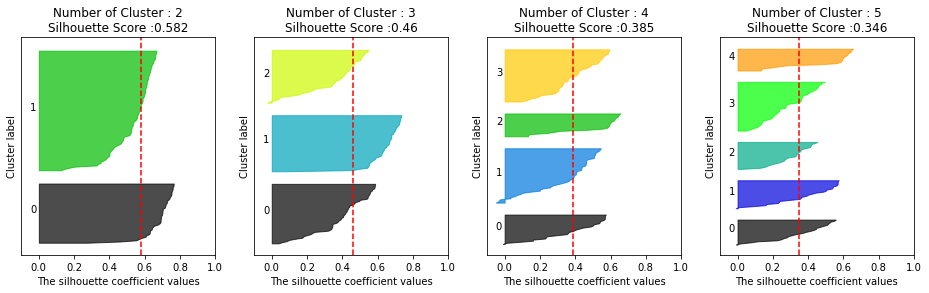

In [18]:
# 이런놈 불러주는 순간에 __pycache__ 안에 생김. pre comfiled source 
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], iris_std)
# 오 이거 뭐야 이쁜뎅

In [19]:
# Compiler vs Interpeter (Script)
# __pycache__